<h3>1.Task 1: Dataset Selection 
A.Choose two datasets from the provided repositories. 
Dataset 1: Titanic Dataset
Dataset 2: FIFA-21 Complete Dataset</h3>

<h3>B.Justify your selection for each dataset based on its relevance to machine learning tasks.
Include a brief paragraph explaining the dataset's potential for analysis and its suitability for machine learning applications.
Dataset 1: Titanic Dataset
Justification:The Titanic dataset is a renowned and long-lasting dataset in the disciplines of data science and machine learning.
It contains information about the passengers that boarded the RMS Titanic on its tragic first voyage,
including whether or not they survived. The dataset may be used for machine learning applications
since it contains categorical and numerical data that can be trained to 
create a machine learning model that can predict whether or not a passenger survived the accident based on their features.


Dataset 2: FIFA-21 Complete Dataset
Justification: The FIFA-21 Complete Dataset encompasses player ratings, ages, nationalities, positions, and potential for
the future for machine learnig this dataset provides valuable features for analysis and modeling, but care should be 
taken to account for potential discrepancies caused by transfer updates.</h3>

<h3>Task 2: Data Exploration with Python 
A.Perform exploratory data analysis (EDA) using Python for the first dataset. 
B.Generate summary statistics, identify data types, and visualize the data distribution to gain insights into the dataset.</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('E:/Lab 10/titanic.csv', encoding = 'ISO-8859-1')

In [3]:
print("Preview of the dataset:")
print(df.head())

Preview of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

In [4]:
print("\nDataset Information")
print(df.info())


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print("\nSummary Statistics")
print(df.describe())


Summary Statistics
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  



Histograms:


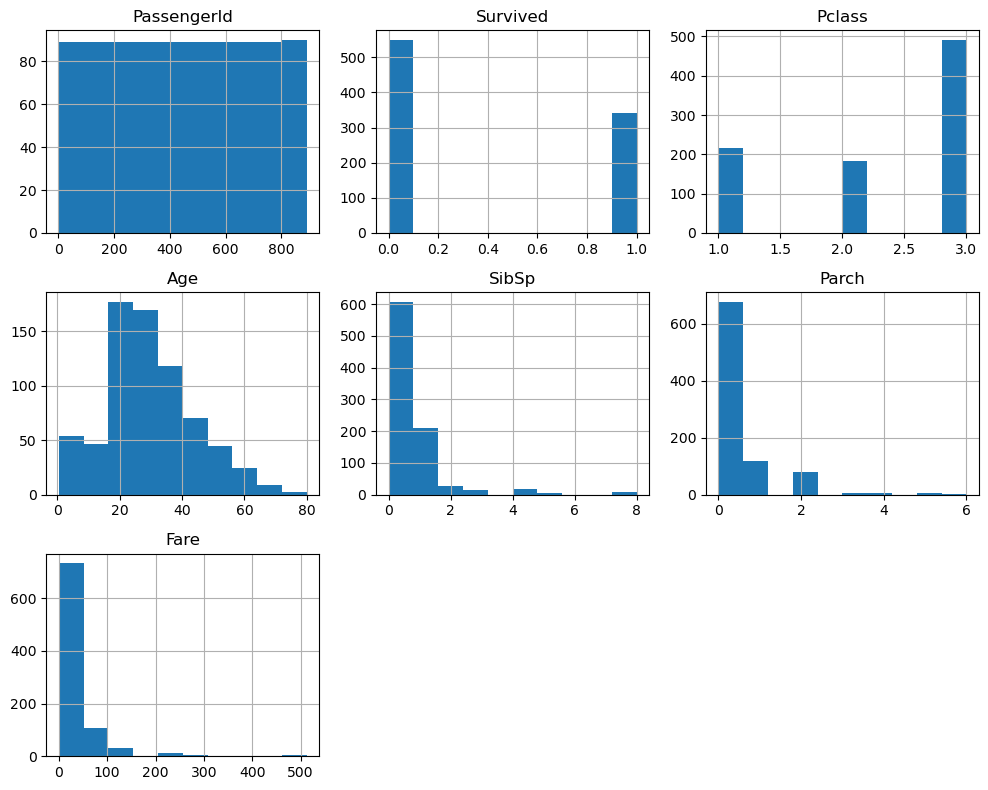

In [6]:
print("\nHistograms:")
df.hist(figsize=(10,8))
plt.title("Histogram")
plt.tight_layout()
plt.show()

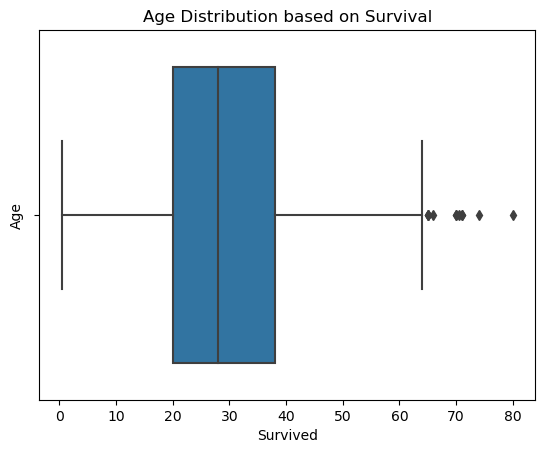

In [7]:
sns.boxplot(x='Age', data=df)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age Distribution based on Survival')
plt.show()

<h3>Task 3: Data Preprocessing with Python 
a.Preprocess the data from the first dataset using Python. 
b.Handle missing values, outliers, and perform feature engineering when necessary to prepare the data for machine learning models.</h3>

In [8]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# Removing outliers
df = df[df['Age'] < 60]  # Remove outliers where age is greater than 60

In [10]:
# Feature engineering
df['age_squared'] = df['Age'] ** 2  # Add new feature: age_squared

In [11]:
df.drop(['Cabin','Name','Ticket','PassengerId'], axis =1, inplace = True) 
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  age_squared
0         0       3    male  22.0      1      0   7.2500        S        484.0
1         1       1  female  38.0      1      0  71.2833        C       1444.0
2         1       3  female  26.0      0      0   7.9250        S        676.0
3         1       1  female  35.0      1      0  53.1000        S       1225.0
4         0       3    male  35.0      0      0   8.0500        S       1225.0


In [14]:
#Converting 'Sex' and 'Embarked' into category
df['Sex']=pd.factorize(df['Sex'])[0]
df['Embarked']=pd.factorize(df['Embarked'])[0]

<h3>Task 4: Implement Machine Learning Models with Python 
Implement at least two different machine learning models (e.g., SVM, Random Forest, Neural Network) for the first dataset using Python. 
Evaluate and compare the performance of each model using appropriate metrics to determine the most suitable model for the dataset.
</h3>

In [16]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
svm_model = SVC(kernel='linear', random_state=1)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM: {svm_accuracy:.2f}')
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Accuracy of SVM: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        78
           1       0.80      0.67      0.73        60

    accuracy                           0.78       138
   macro avg       0.79      0.77      0.77       138
weighted avg       0.78      0.78      0.78       138



In [19]:
random_forest_model = RandomForestClassifier(random_state=1)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)
frst_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest: {frst_accuracy:.2f}')



classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Accuracy of Random Forest: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82        78
           1       0.77      0.73      0.75        60

    accuracy                           0.79       138
   macro avg       0.79      0.78      0.78       138
weighted avg       0.79      0.79      0.79       138



Looking at both results Random Forest it is a close call between both models but  Forest Model is slightly better than SVM.

<h3>Task 5: Visualization with Python 
A.Create meaningful visualizations (e.g., scatter plots, heatmaps, bar charts) for the first dataset using Python. 
B.Use libraries like Matplotlib, Seaborn, or Plotly to create clear and insightful visual representations of the dataset.</h3>

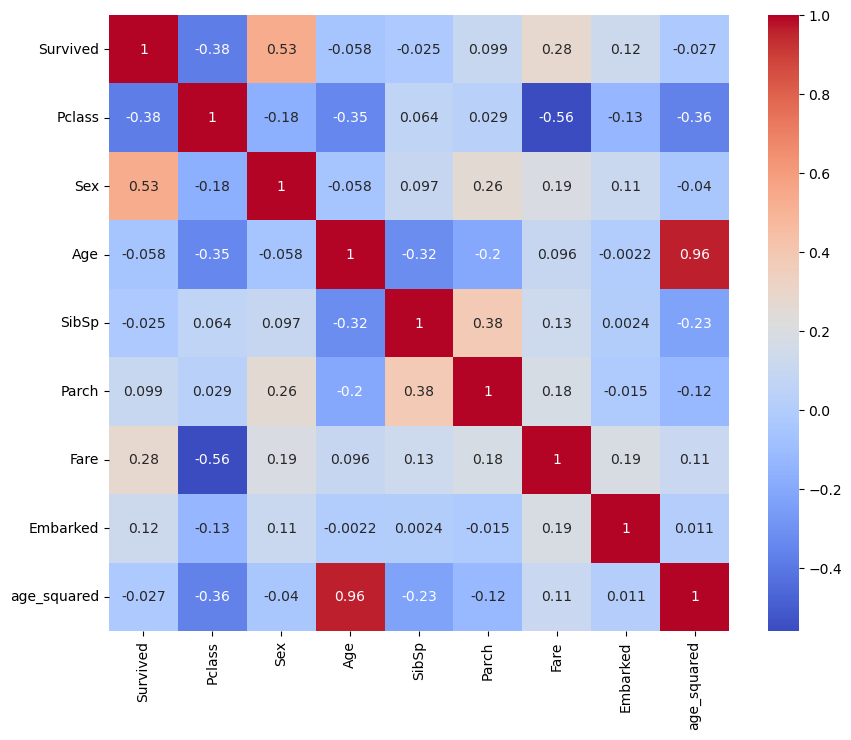

In [20]:
#heat map
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot = True, cmap="coolwarm")
plt.show()

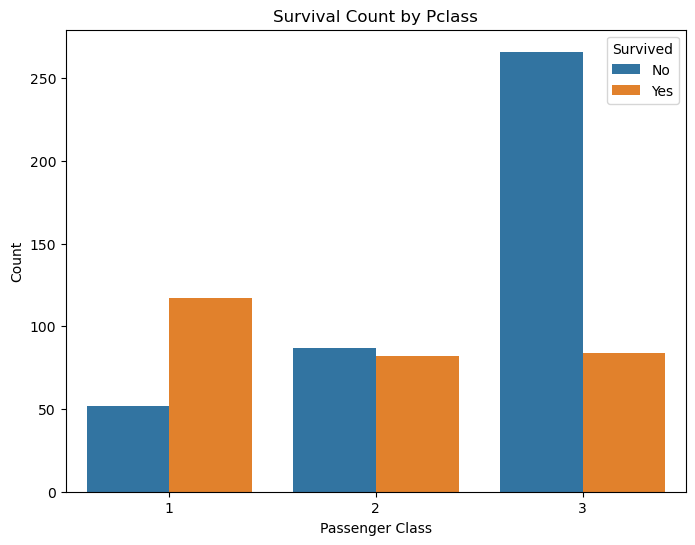

In [21]:
#Box plot Survival Count by Pclass 
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

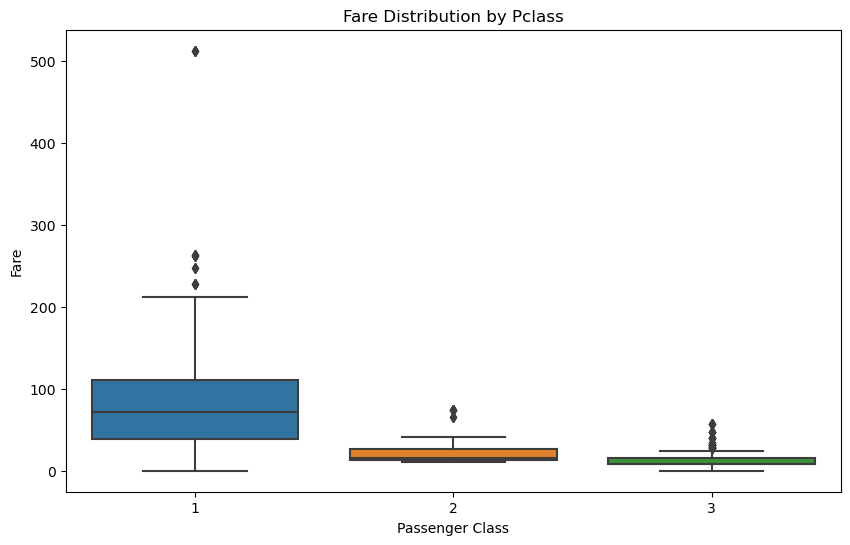

In [22]:
#Fare Distribution by Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

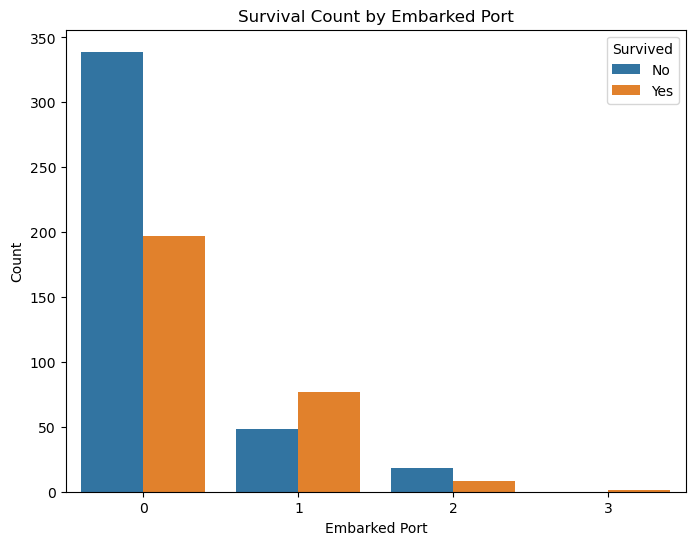

In [23]:
#Survival Count by Embarked Port
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

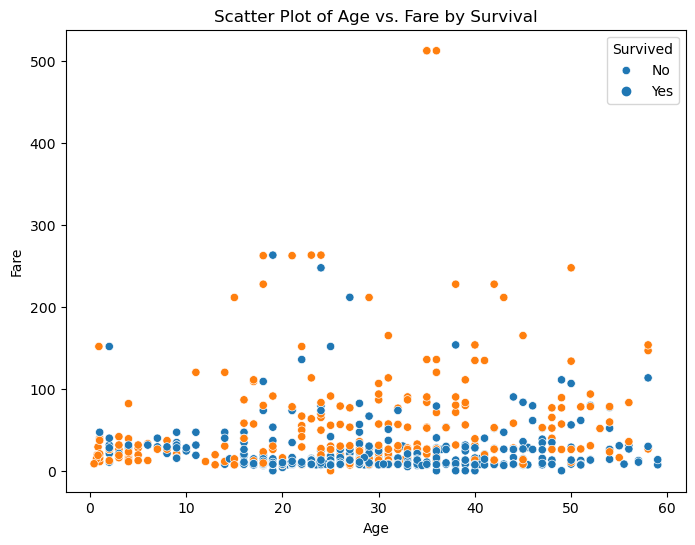

In [24]:
#Scatter Plot of Age vs. Fare by Survival
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Scatter Plot of Age vs. Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()